# Advertising

Predict the total sales generated through all sales channel

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt = pd.read_csv('Advertising.csv')
dt

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
print(dt.shape)     #no. of rows & columns
print(dt.columns)   #column names

(200, 5)
Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [4]:
#check for description like datatype, non-null values
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
#checking null values for each row
dt.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

## Exploratory Data Analysis

In [6]:
#Stats
dt.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
#Correlation map of dataset
dt.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

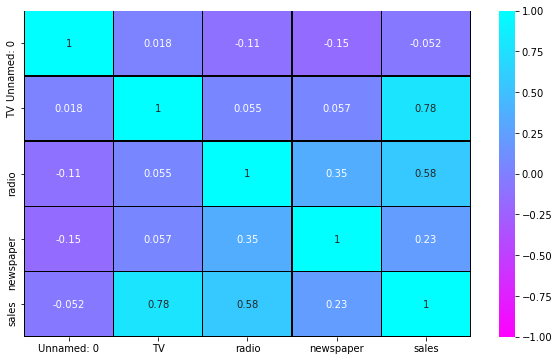

In [8]:
#correlation map
plt.figure(figsize=(10,6))
sns.heatmap(dt.corr(),annot=True, linecolor='black',linewidths=0.4,cmap = 'cool_r',vmin=-1, vmax=1)

### Visualisation

In [9]:
sns.set_style('whitegrid')

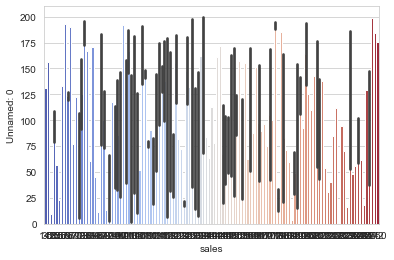

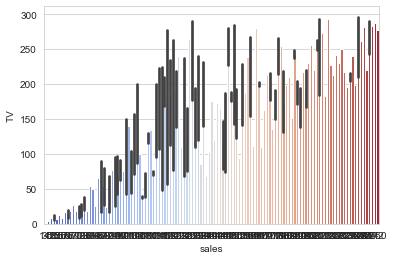

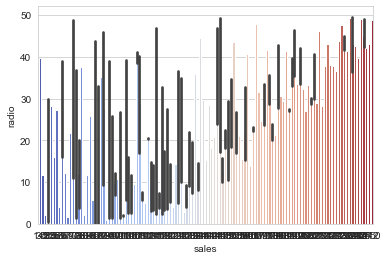

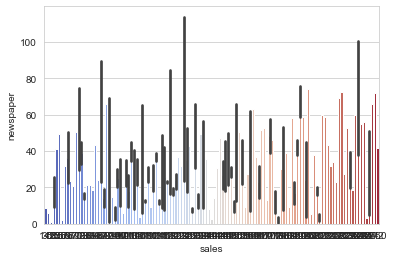

In [10]:
for i, cols in enumerate(dt.columns[:-1]):
    plt.figure(i)
    sns.barplot(x='sales',y=cols,data=dt, saturation=0.7, palette = 'coolwarm')

No conclusive observation can be made except for the sales through TV channel is linear

<Figure size 432x288 with 0 Axes>

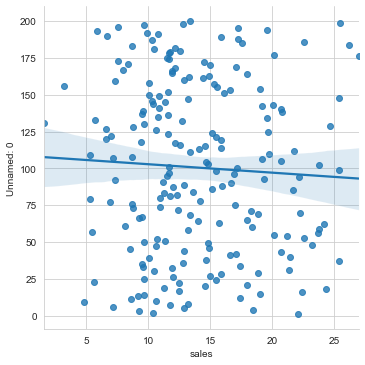

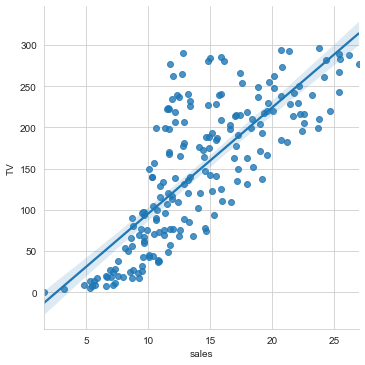

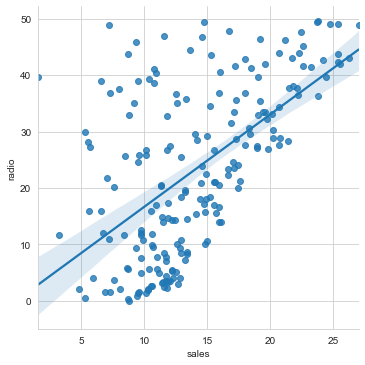

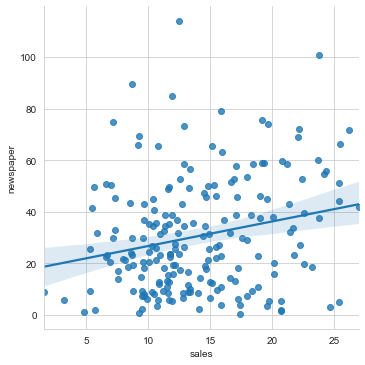

In [11]:
for i, cols in enumerate(dt.columns[:-1]):
    plt.figure(i)
    sns.lmplot(x='sales',y=cols,data=dt, palette = 'coolwarm')

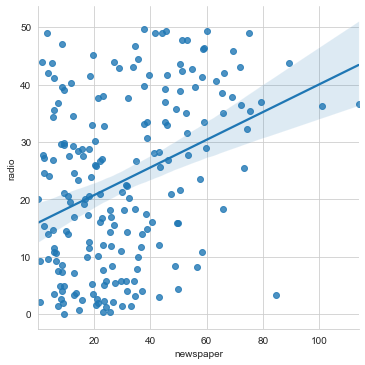

In [12]:
sns.lmplot(x='newspaper',y='radio',data=dt)

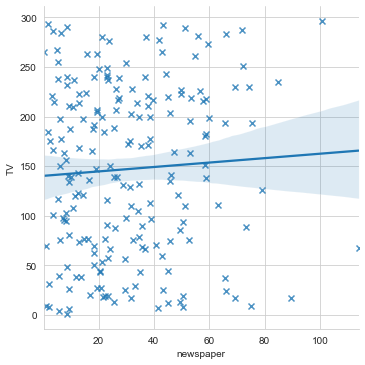

In [13]:
sns.lmplot(x='newspaper',y='TV',data=dt, markers ='x')

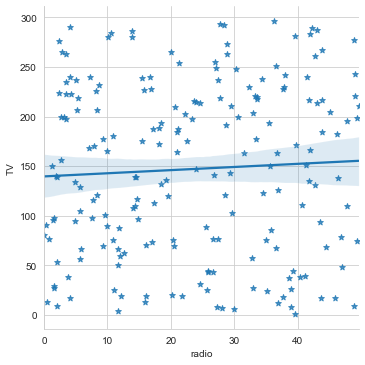

In [14]:
sns.lmplot(x='radio',y='TV',data=dt,markers = '*')

C:\Users\Nitin Patel\anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(
C:\Users\Nitin Patel\anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(
C:\Users\Nitin Patel\anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(
C:\Users\Nitin Patel\anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(


<Figure size 432x288 with 0 Axes>

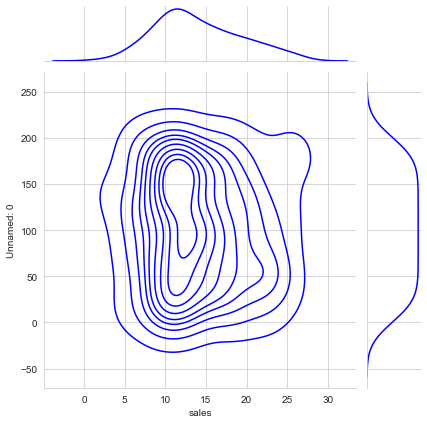

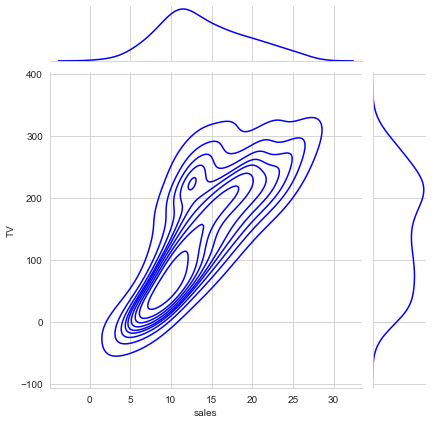

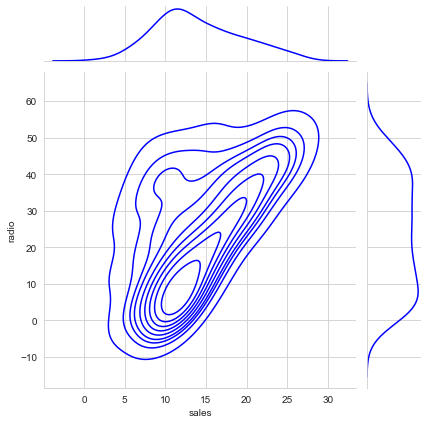

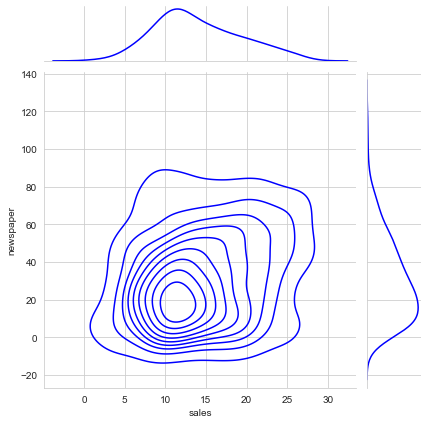

In [15]:
for i,cols in enumerate(dt.columns[:-1]):
    plt.figure(i)
    sns.jointplot(x='sales',y=cols,data=dt,color='blue',bins=5,kind='kde')

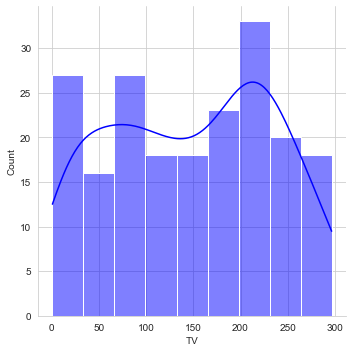

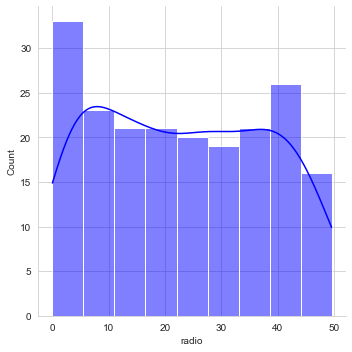

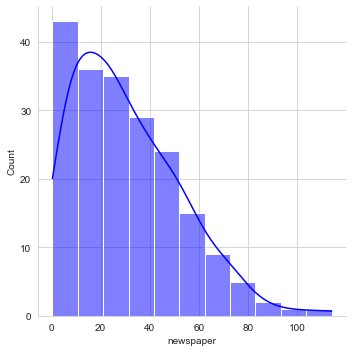

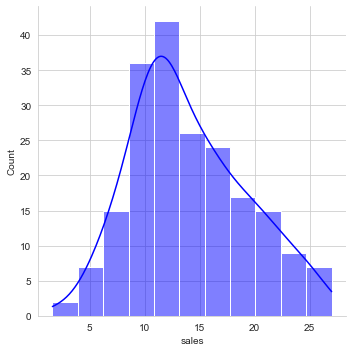

In [16]:
for i in dt.columns[1:]:    
    sns.displot(x=i,color = 'blue', data = dt, kde=True)

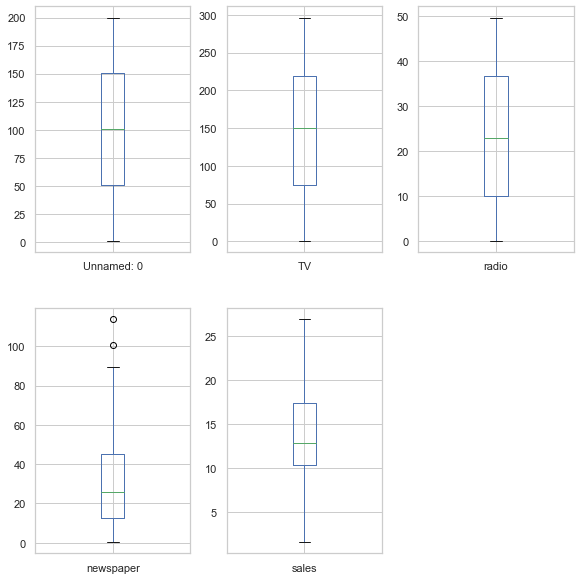

In [17]:
sns.set(style = 'whitegrid')
dt.plot(kind = 'box', subplots = True, layout = (2,3), figsize  = (8,8))
plt.tight_layout(pad=0.4,w_pad=0.7,h_pad=3)

No outliers present and since we have small dataset, we cannot afford to drop the outliers.

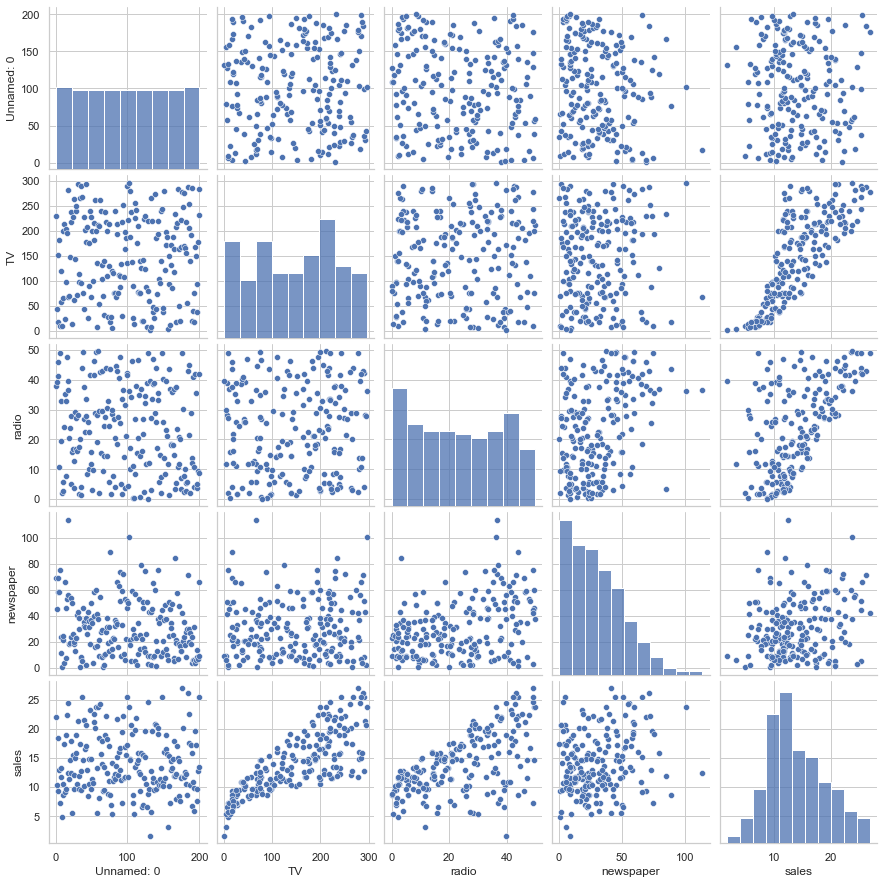

In [18]:
sns.pairplot(dt)

## Data Preprocessing/ Feature Engineering

In [19]:
dt.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [20]:
#droppin first columns as it has no use in precting sales figure
dt.drop('Unnamed: 0',axis =1 , inplace = True)

In [21]:
dt.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [22]:
dt.agg(['skew']).transpose()

,skew
TV,-0.069853
radio,0.094175
newspaper,0.894720
sales,0.407571


As per the thumb rule of skewness, our data is moderately skewed

In [23]:
#applying boxcox transformation to 'newspaper'
from scipy.stats import boxcox
dt['newspaper'] = boxcox(dt['newspaper'],0)

In [24]:
#Splitting the data into independent variables and target variable
x = dt.drop('sales',axis=1)
y = dt['sales']

In [25]:
x

,TV,radio,newspaper
0,230.1,37.8,4.237001
1,44.5,39.3,3.808882
2,17.2,45.9,4.238445
3,151.5,41.3,4.069027
4,180.8,10.8,4.067316
...,...,...,...
195,38.2,3.7,2.624669
196,94.2,4.9,2.091864
197,177.0,9.3,1.856298
198,283.6,42.0,4.192680


In [26]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [27]:
#Scaling the Data for standardization
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

## Data Modelling

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [29]:
for i in range(20,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.23,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    score = lr.score(x_train, y_train)
    y_pred = lr.predict(x_test)
    print('For random state:',i)
    print('Model Scoring on trained dataset:',score)
    print('R2 Score:', r2_score(y_test,y_pred))
    print('Mean absolute error:', mean_absolute_error(y_test,y_pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

For random state: 20
Model Scoring on trained dataset: 0.9077507857128019
R2 Score: 0.8885813096748889
Mean absolute error: 1.3781322081983793
Root mean squared error: 1.7876557877645805


For random state: 21
Model Scoring on trained dataset: 0.9134448872399094
R2 Score: 0.8767950539830902
Mean absolute error: 1.3911540788740056
Root mean squared error: 1.7838371461542322


For random state: 22
Model Scoring on trained dataset: 0.9315380884384136
R2 Score: 0.864938902954318
Mean absolute error: 1.281303639664035
Root mean squared error: 1.871915555771992


For random state: 23
Model Scoring on trained dataset: 0.9100942769438501
R2 Score: 0.8828429364785029
Mean absolute error: 1.2349144171914404
Root mean squared error: 1.7959689138125479


For random state: 24
Model Scoring on trained dataset: 0.9183584670101593
R2 Score: 0.8873352628353903
Mean absolute error: 1.2397540115663148
Root mean squared error: 1.7613238444359953


For random state: 25
Model Scoring on trained dataset: 0.8

For random state: 78
Model Scoring on trained dataset: 0.9215771805722809
R2 Score: 0.8846582297518828
Mean absolute error: 1.3292089610792912
Root mean squared error: 1.7443400812083372


For random state: 79
Model Scoring on trained dataset: 0.8953976976149688
R2 Score: 0.8794802836036153
Mean absolute error: 1.3930831552320992
Root mean squared error: 1.8740769798628671


For random state: 80
Model Scoring on trained dataset: 0.927822558708808
R2 Score: 0.8578685697891297
Mean absolute error: 1.3213009257662807
Root mean squared error: 1.9742410824716614


For random state: 81
Model Scoring on trained dataset: 0.8741788569285724
R2 Score: 0.8850371801035538
Mean absolute error: 1.4166782619889384
Root mean squared error: 1.839942732439907


For random state: 82
Model Scoring on trained dataset: 0.9136610469094842
R2 Score: 0.889755241687757
Mean absolute error: 1.2939658228113142
Root mean squared error: 1.7640738383525487


For random state: 83
Model Scoring on trained dataset: 0.9

In [30]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((46, 3), (154, 3), (46,), (154,))

### Linear Regression

In [31]:
#we'll take random_state = 37
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.23, random_state = 37)

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(lr.score(x_train,y_train))
print('R2 Score:', r2_score(y_test,y_pred))
print('CV Score:', np.mean(cross_val_score(lr, x, y)))

0.8993233142515203
R2 Score: 0.8858691374756924
CV Score: 0.8880462922246707


## Hyperparameter Tuning & GridSearchCV

In [32]:
def cv_score(model):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.23, random_state = 37)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(model.score(x_train,y_train))
    print('R2 Score:', r2_score(y_test,y_pred))
    print('CV Score:', np.mean(cross_val_score(lr, x, y)))
    
    print('Mean absolute error:', mean_absolute_error(y_test,y_pred))
    print('Root MSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

### Support Vector Regressor

In [33]:
from sklearn.svm import SVR
svr = SVR()
svr_para = {'C': [0.6,0.7,0.8,0.9,1,1.2,1.3,1.4,1.5],
            'kernel': ['rbf','poly','linear'],
            }
svr_tuning = GridSearchCV(estimator = svr, param_grid = svr_para, cv=5)
svr_tuning.fit(x,y)
print(svr_tuning.best_params_)
print(svr_tuning.best_score_)

{'C': 1.5, 'kernel': 'rbf'}
0.9262199005941975


In [34]:
svr = SVR(C=1.5, kernel = 'rbf')
cv_score(svr)

0.9430164904016592
R2 Score: 0.9407343400344182
CV Score: 0.8880462922246707
Mean absolute error: 0.6760882592394719
Root MSE: 1.1764244286541163


### Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr_para = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
            'splitter':['best','random'],
            'max_depth': [10,20,30,40,50],
            'min_samples_split': [2,4,6,8,10],
            }
dtr_tuning = GridSearchCV(dtr, dtr_para, cv=5)
dtr_tuning.fit(x,y)
print(dtr_tuning.best_params_)
print(dtr_tuning.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_split': 2, 'splitter': 'best'}
0.960233642124981


In [43]:
dtr = DecisionTreeRegressor(criterion = 'friedman_mse',
                            max_depth = 10,
                            splitter= 'best',
                            min_samples_split = 2)
cv_score(dtr)

0.9999792625760058
R2 Score: 0.9220508680622663
CV Score: 0.8880462922246707
Mean absolute error: 0.875
Root MSE: 1.3491744657865545


### Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr_para = {'n_estimators':[100,125,150],
            'criterion': ['squared_error','poisson','absolute_error'],
            'max_depth': [30,40,50],
            'min_samples_split': [2,4,6],
            'max_features': ['auto','sqrt','log2']}
rfr_tuning = GridSearchCV( rfr, rfr_para, cv = 5)
rfr_tuning.fit(x,y)
print(rfr_tuning.best_params_)
print(rfr_tuning.best_score_)

{'criterion': 'absolute_error', 'max_depth': 50, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
0.9768093564002831


In [55]:
rfr = RandomForestRegressor(criterion = 'absolute_error',
                           max_depth = 50,
                           max_features = 'auto',
                           min_samples_split = 2,
                           n_estimators = 100)
cv_score(rfr)

0.9973285944419394
R2 Score: 0.967896076674668
CV Score: 0.8880462922246707
Mean absolute error: 0.6921304347826088
Root MSE: 0.8658477373925652


### Extra Tree Regressor

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr_para = {'n_estimators': [100,125,150,175,200],
            'criterion': ['squared_error','absolute_error'],
            'max_depth': [30,40,50],
            'min_samples_split':[2,4,6,8],
            'max_features': ['auto','sqrt','log2'],}
etr_tuning = GridSearchCV(etr, etr_para, cv=5)
etr_tuning.fit(x,y)
print(etr_tuning.best_params_)
print(etr_tuning.best_score_)

{'criterion': 'absolute_error', 'max_depth': 40, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 150}
0.9876154860885645


In [45]:
etr = ExtraTreesRegressor(criterion = 'absolute_error',
                         max_depth = 40,
                         max_features = 'auto',
                         min_samples_split = 2, n_estimators = 150)
cv_score(etr)

1.0
R2 Score: 0.9865345961516999
CV Score: 0.8880462922246707
Mean absolute error: 0.4501739130434781
Root MSE: 0.5607537198267328


### SGD Regressor

In [46]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd_para = {'alpha': [1,1.5,2,2,5,3],
            'penalty':['l2','l1'],
            'learning_rate': ['optimal','constant','invscaling']}
sgd_tuning = GridSearchCV(estimator = sgd, param_grid = sgd_para, cv = 10)
sgd_tuning.fit(x,y)
print(sgd_tuning.best_params_)
print(sgd_tuning.best_score_)

{'alpha': 1, 'learning_rate': 'invscaling', 'penalty': 'l1'}
0.8148713837764973


In [48]:
sgd = SGDRegressor(alpha = 1, learning_rate = 'invscaling', penalty = 'l1')
cv_score(sgd)

0.8348157077628136
R2 Score: 0.8377332430974153
CV Score: 0.8880462922246707
Mean absolute error: 1.4371159180244508
Root MSE: 1.946602379115782


### KNeighbors Regressor

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr_para = {'n_neighbors' : [5,10,15],
            'algorithm': ['auto','ball_tree', 'kd_tree', 'brute'],
            'weights': ['uniform','distance'],
            'metric': ['euclidean', 'minkowski']
            }
knr_tuning = GridSearchCV(knr,knr_para, cv=10)
knr_tuning.fit(x,y)
print(knr_tuning.best_params_)
print(knr_tuning.best_score_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.9420277335346317


In [50]:
knr = KNeighborsRegressor( algorithm='auto',
                          metric = 'euclidean',
                         n_neighbors = 5,
                         weights = 'distance')
cv_score(knr)

1.0
R2 Score: 0.9604305283740309
CV Score: 0.8880462922246707
Mean absolute error: 0.704603580599784
Root MSE: 0.9612638212385879


### AdaBoostRegressor

In [51]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
abr_para = {'n_estimators': [50,75,100,125,150,200],
            'loss': ['linear','square','exponential']}
abr_tuning = GridSearchCV(abr, abr_para, cv=5)
abr_tuning.fit(x,y)
print(abr_tuning.best_params_)
print(abr_tuning.best_score_)

{'loss': 'square', 'n_estimators': 150}
0.9583486096677376


In [52]:
abr = AdaBoostRegressor(loss = 'square', n_estimators = 150)
cv_score(abr)

0.9796786488219251
R2 Score: 0.9604409567864105
CV Score: 0.8880462922246707
Mean absolute error: 0.7933598631021761
Root MSE: 0.9611371438319006


#### We can consider the Decision Tree Regressor model as the best of the rest since its CV score is closer to R2 Score

# Saving the best model

In [53]:
import pickle
save_file = 'DTR_Practiceproject_6.pkl'
pickle.dump(dtr,open(save_file,'wb'))

load_file = pickle.load(open(save_file,'rb'))
print(cv_score(dtr))

0.9999792625760058
R2 Score: 0.9210547725059007
CV Score: 0.8880462922246707
Mean absolute error: 0.8815217391304347
Root MSE: 1.3577675090734982
None
